<a href="https://colab.research.google.com/github/titocampos/data_science_na_pratica/blob/master/Analisando%20os%20Dados%20do%20Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb - *Lisboa***
*by titocampos*

---
<CENTER><img alt="Lisboa"  width="60%" src="https://raw.githubusercontent.com/titocampos/data_science_na_pratica/master/lisboa.jpg"></CENTER>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## **Obtenção dos Dados**

Todos os dados disponibilizados neste notebook, foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Nesta análise usaremos apenas o arquivo com as informações sumarizadas abaixo:

listings.csv - Summary information and metrics for listings in Lisbon (good for visualisations).

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/portugal/lisbon/lisbon/2020-04-29/visualisations/listings.csv')

## **Análise dos Dados**

Vamos nos acostumar com as informações e entender como os dados estão estrutuados





**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de qualquer coisa, vamos ver a cara do nosso *dataset*, analisando as primeiras entradas.



In [3]:
# mostrar as 3 primeiras entradas
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.38,1,307
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.54,1,317
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,3,321,2020-03-11,2.82,1,351


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O próximo passo em nossa análise é identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos dados de cada coluna.

Baixamos a vesão resumida dos dados, apenas 16 variáveis. Na mesma página, onde baixamos nossa versão, existe uma versão mais completa com 106 variáveis (`listings.csv.gz`).

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print ("Variáveis:\t {}\n".format(df.shape[1]))

# Identificar as variáveis (colunas) do nosso dataset
display(df.dtypes)

Entradas:	24640
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100.0

reviews_per_month                 16.854708
last_review                       16.854708
name                               0.077110
host_name                          0.004058
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

Pela análise, podemos verificar que:

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 17% das linhas.
* As variáveis `name` e `host_name` possuem valores nulos mas em quantidade desprezível.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Vamos usar histogramas para identificar a distribuição das variáveis.

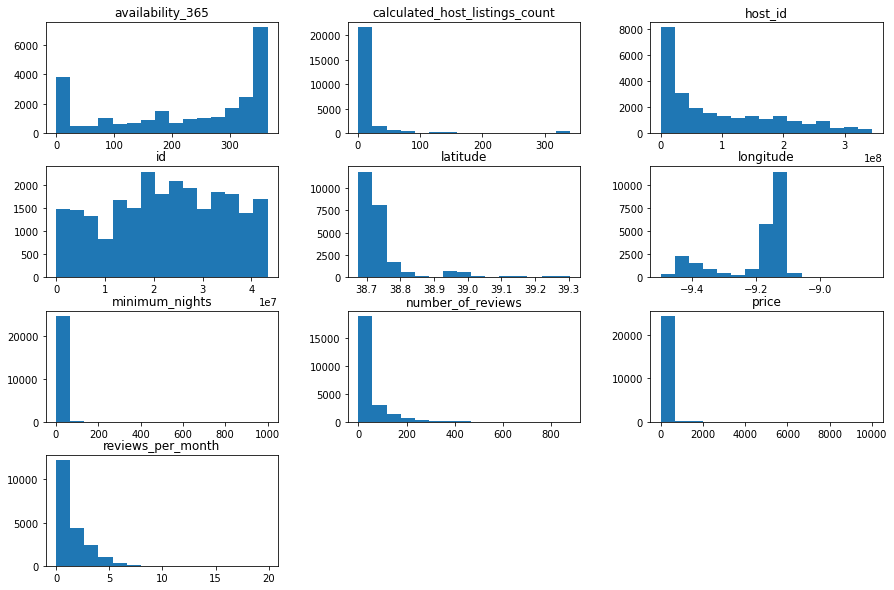

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(grid=False, bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel? E a média de permanencia mínima?**

Uma informação interessante é o preço médio cobrado por noite, mas precisamos analisar também a existencia de outliers, que podem ser vistos claramente no histograma da coluna `price` anterior. Para inicio da análise vamos verificar o valor mínimo e o máximo da coluna preço.


In [7]:
#minimo geral da coluna price em R$
print("Preço mínimo do aluguel $ {:.2f}".format(df.price.min()))

#maximo geral da coluna price em R$
print("Preço máximo do aluguel $ {:.2f}".format(df.price.max()))

Preço mínimo do aluguel $ 0.00
Preço máximo do aluguel $ 10000.00


De posse desses valores extremos, vamos filtrar nosso dataset excluindo esses valores. Após plotaremos novamente o histograma para análise.

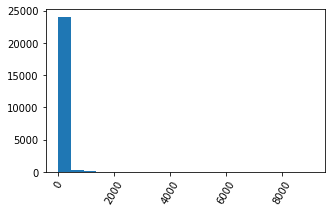

In [8]:
import numpy as np
df1 = df[np.logical_and(df['price']>0, df['price']<10000)]
df1.price.hist(grid=False, figsize=(5,3), xrot=60, bins=20)

Como podemos ver pelo gráfico, a maioria dos registros estão abaixo de $ 500.00, sendo assim plotaremos novamente o histograma para esses valores.

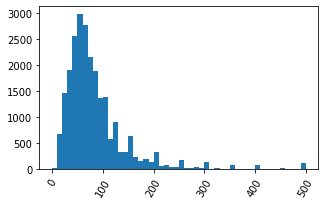

In [9]:
df1.price.hist(grid=False, figsize=(5,3), xrot=60, bins=np.array(range(0, 501, 10)));

Agora temos uma melhor distribuição dos valores. Mas ainda vemos alguns valores esparsos. Vamos filtrar novamente o dataset para valores com mais de 50 registros e calcular a média e a mediana.

Preço médio do aluguel $ 104.95
Mediana do preço do aluguel $ 69.00


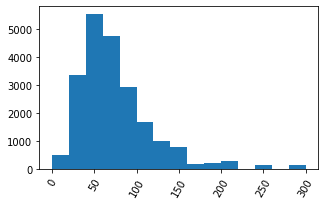

In [10]:
#calculando o numero de registros por preco
s1 = df1['price'].value_counts()

#selecionando os registros com mais de 50 ocorrencias
s2 = s1[s1 > 50].index

#filtrando o dataset
df2 = df1[df1['price'].isin(s2.values)]

#plotando o histograma para valores de 20 em 20
df2.price.hist(grid=False, figsize=(5,3), xrot=60, bins=np.array(range(0, 301, 20)));

#média geral da coluna price em R$
print("Preço médio do aluguel $ {:.2f}".format(df1.price.mean()))
#mediana geral da coluna price em R$
print("Mediana do preço do aluguel $ {:.2f}".format(df1.price.median()))

A coluna `minimum_nights` tabém possui outliers mas para ela usaremos uma abordagem diferente. Vamos simplemente excluir os registros com valor maior que 15 noites.

A média de noites por anúncio é: 3
A mediana de noites por anúncio é: 2


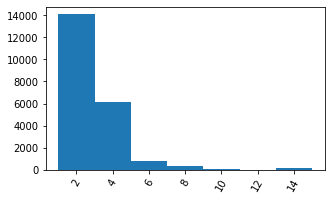

In [11]:
#excluindo os registros inconsistenstes
df3=df2.drop(df2[df2.minimum_nights > 15].index, axis=0)
df3.minimum_nights.hist(grid=False, figsize=(5,3), xrot=60, bins=7);

#média da coluna minimum_nights
print("A média de noites por anúncio é: {:.0f}".format(df1.minimum_nights.mean()))
#mediana da coluna minimum_nights
print("A mediana de noites por anúncio é: {:.0f}".format(df1.minimum_nights.median()))

### **Q5. Qual a correlação existente entre as variáveis**

Em estatística correlação é a interdependência entre duas ou mais variáveis. Para identificar as correlações existentes entre as variáveis de interesse, podemos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [12]:
# criar uma matriz de correlação
corr = df3[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.021729,-0.110397,-0.103520,-0.027628,0.010895
minimum_nights,-0.021729,1.000000,-0.019514,-0.101527,-0.069535,-0.047726
number_of_reviews,-0.110397,-0.019514,1.000000,0.780481,-0.086292,0.088259
reviews_per_month,-0.103520,-0.101527,0.780481,1.000000,-0.095305,0.085996
calculated_host_listings_count,-0.027628,-0.069535,-0.086292,-0.095305,1.000000,0.053341
availability_365,0.010895,-0.047726,0.088259,0.085996,0.053341,1.000000


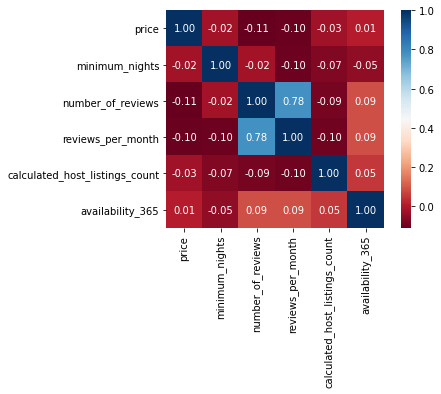

In [13]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna 'room_type' indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas. Vamos utilizar o método **value_counts** para ver como está distribuida a oferta de anúncios.

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df3.room_type.value_counts()

Entire home/apt    15517
Private room        5219
Hotel room           478
Shared room          367
Name: room_type, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df3.room_type.value_counts() / df3.shape[0] * 100

Entire home/apt    71.901209
Private room       24.183309
Hotel room          2.214911
Shared room         1.700570
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) em função do preço de locação.



In [16]:
# ver preços por bairros, na média
df3.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Vermelha                                      350.000000
Vale do Paraso                                150.000000
Carvoeira e Carmes                            132.500000
Ribamar                                       131.461538
Vila Verde dos Francos                        130.363636
Dois Portos e Runa                            129.800000
Arranh                                        126.666667
So Domingos de Benfica                        125.795620
Aldeia Galega da Merceana e Aldeia Gavinha    121.111111
Alhandra, So Joo dos Montes e Calhandriz      120.000000
Name: price, dtype: float64

Como são fornecidas as latitudes e longitudes de cada imóvel no dataset, podemos plotar a distribuição dos imóveis pela cidade.

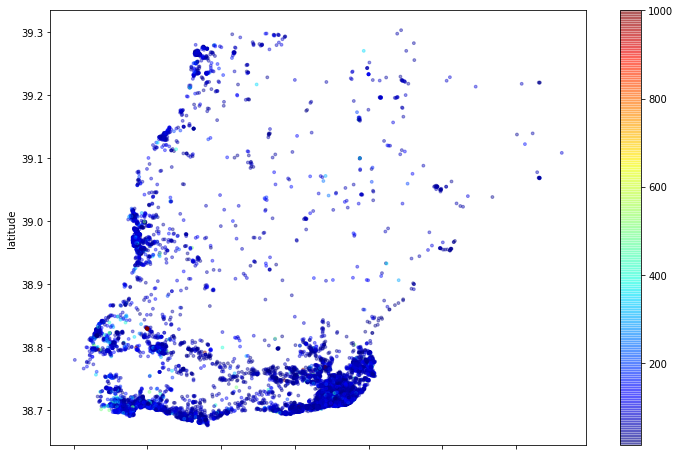

In [17]:

# plotar os imóveis pela latitude-longitude
df3.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df3['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Conclusões**

A análise na base de dados do Airbnb foi superficial, mas mesmo assim foi possivel a utilização de várias técnicas de exploração.

Pode-se notar que em algumas regiões existem poucos imóveis disponíveis, o que pode contribuir para a distorção de informações estatísticas de alguns atributos.

Esta análise foi baseada no conjunto de dados resumido de Lisboa. Para uma análise mais aprofundada recomenda-se a utilização do conjunto de dados completo, que possui 106 atributos disponíveis e portanto, oferece uma gama maior de observações.
